In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import Optional, TypedDict
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [8]:
# defining state
class BlogState(TypedDict):
    title: Optional[str]
    outline: Optional[str]
    content: Optional[str]

In [17]:
# creating a outline function
def create_outline(state: BlogState) -> BlogState:
    # using the model to create an outline
    title = state["title"]
    prompt = f"Create a detailed outline for a blog post about: {title}"
    outline = model.invoke(prompt)
    state["outline"] = outline
    return state

In [18]:
# creating the blog function
def create_blog(state: BlogState) -> BlogState:
    outline = state["outline"]
    prompt = f"Write a detailed blog post based on the following outline: {outline}"
    content = model.invoke(prompt)
    state["content"] = content
    return state

In [19]:
# defining  the graph
graph = StateGraph(BlogState)

# adding nodes
graph.add_node("outline", create_outline)
graph.add_node("blog", create_blog)

# adding edges
graph.add_edge(START, "outline")
graph.add_edge("outline", "blog")
graph.add_edge("blog", END)

# compiling the graph
workflow = graph.compile()


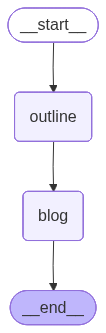

In [13]:
# showing the flowchart of nodes
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [20]:
# Initial State as input
initial_input = {"title": "Deep Learning", "outline": "", "content":""}
final_state = workflow.invoke(initial_input)
print(final_state)

{'title': 'Deep Learning', 'outline': AIMessage(content='This outline provides a comprehensive structure for a blog post on Deep Learning, designed to be informative, engaging, and accessible to a broad audience interested in technology and AI.\n\n---\n\n## Blog Post Outline: Deep Learning Demystified: Understanding the Brains Behind Modern AI\n\n**Target Audience:** Tech enthusiasts, aspiring data scientists, professionals curious about AI, and anyone wanting to understand the core concepts of Deep Learning without getting bogged down in heavy math.\n\n**Tone:** Informative, engaging, slightly awe-inspiring, and accessible.\n\n**Estimated Word Count:** 1500-2000 words\n\n---\n\n### **I. Catchy Title Options:**\n\n*   Deep Learning Demystified: Understanding the Brains Behind Modern AI\n*   Unlocking the AI Revolution: A Deep Dive into Deep Learning\n*   Beyond the Buzzword: What is Deep Learning and Why Does it Matter?\n*   The Power of Layers: How Deep Learning is Reshaping Our World

In [23]:
print(final_state["outline"].content)

This outline provides a comprehensive structure for a blog post on Deep Learning, designed to be informative, engaging, and accessible to a broad audience interested in technology and AI.

---

## Blog Post Outline: Deep Learning Demystified: Understanding the Brains Behind Modern AI

**Target Audience:** Tech enthusiasts, aspiring data scientists, professionals curious about AI, and anyone wanting to understand the core concepts of Deep Learning without getting bogged down in heavy math.

**Tone:** Informative, engaging, slightly awe-inspiring, and accessible.

**Estimated Word Count:** 1500-2000 words

---

### **I. Catchy Title Options:**

*   Deep Learning Demystified: Understanding the Brains Behind Modern AI
*   Unlocking the AI Revolution: A Deep Dive into Deep Learning
*   Beyond the Buzzword: What is Deep Learning and Why Does it Matter?
*   The Power of Layers: How Deep Learning is Reshaping Our World
*   From Pixels to Predictions: Your Guide to Deep Learning

---

### **II.

In [25]:
print(final_state["content"].content)

## Deep Learning Demystified: Understanding the Brains Behind Modern AI

Siri understands your commands, Netflix knows exactly what movie you’ll want to watch next, self-driving cars navigate complex city roads, and medical scans can pinpoint diseases with astonishing accuracy. We live in an era where Artificial Intelligence (AI) is not just a futuristic concept but an omnipresent force shaping our daily lives. But how do these intelligent systems truly work? What’s the secret sauce behind their incredible capabilities?

The answer, in many cases, lies within a powerful and transformative technology known as Deep Learning. Deep Learning isn't just a buzzword; it's a revolutionary subset of Machine Learning, inspired by the intricate workings of the human brain, that has propelled AI into an unprecedented era of breakthroughs. It’s the driving force behind many of the most exciting advancements we see today, from natural language understanding to computer vision.

In this post, we'll em